# Determines

-  Salaries in the field of data professions vary widely based on factors such as experience, job role, and performance. Accurately predicting salaries for data professionals is essential for both job seekers and employers.

The dataset contains the following columns:

**1.FIRST NAME:** First name

**2.LAST NAME:** Last name

**3.SEX:** Gender

**4.DOJ:** Date of joining the company

**5.CURRENT DATE:** Current date of data

**6.DESIGNATION:** Job role/designation

**7.AGE:** Age

**8.SALARY:** Target variable, the salary of the data professional

**9.UNIT:** Business unit or department

**10.LEAVES USED:** Number of leaves used

**11.LEAVES REMAINING:** Number of leaves remaining

**12.RATINGS:** Ratings or performance ratings

**13.PAST EXP:** Past work experience


# Tasks
Our Mission:
Your mission in this internship is to build a predictive model for salaries of data professionals. You will
follow these key steps:
1. Exploratory Data Analysis (EDA): Dive into the dataset, conduct comprehensive EDA, and unveil
valuable insights about data professionals' salaries. EDA will involve data visualization, summary
statistics, and identifying patterns in the data.
2. Feature Engineering: Create new features or transform existing ones that can provide additional
insights or improve model performance. Feature engineering might involve deriving features related to
experience, job role, and performance.
3. Data Preprocessing: Prepare the data for model training. This includes handling missing values,
encoding categorical variables, and scaling or normalizing features as needed.
4. Machine Learning Model Development: Train various machine learning regression models to predict
salaries. Experiment with different algorithms such as linear regression, decision trees, random forests,
and gradient boosting to find the best-performing model.
5. Model Evaluation: Assess the performance of your models using appropriate evaluation metrics like

Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-
squared (R2) score. Identify the model that provides the most accurate salary predictions.

6. ML Pipelines and Model Deployment: Create ML Pipelines to streamline the end-to-end machine
learning process, from data preprocessing to model training. Additionally, deploy a model that can
generate predictions for unseen data. Consider using frameworks like Flask or FastAPI for deployment.
7. Recommendations: Based on your findings and insights from the model, provide actionable
recommendations. These recommendations can be related to factors influencing salaries and potential
strategies for improving earnings in data professions.

# Import Modules, Load Data and Data Review

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)   
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)    
pd.options.display.float_format = '{:.3f}'.format


from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# EDA

In [2]:
df0 = pd.read_csv("/Users/enejanhayytjanova/Desktop/INTERN_MENTORNSS/Salary Prediction/Salary Prediction of Data Professions.csv")
df = df0.copy()

In [3]:
df.head()

FIRST NAME   LAST NAME SEX         DOJ CURRENT DATE DESIGNATION    AGE  \
0     TOMASA       ARMEN   F   5-18-2014   01-07-2016     Analyst 21.000   
1      ANNIE         NaN   F         NaN   01-07-2016   Associate    NaN   
2      OLIVE        ANCY   F   7-28-2014   01-07-2016     Analyst 21.000   
3     CHERRY     AQUILAR   F  04-03-2013   01-07-2016     Analyst 22.000   
4       LEON  ABOULAHOUD   M  11-20-2014   01-07-2016     Analyst    NaN   

   SALARY        UNIT  LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP  
0   44570     Finance       24.000             6.000    2.000         0  
1   89207         Web          NaN            13.000      NaN         7  
2   40955     Finance       23.000             7.000    3.000         0  
3   45550          IT       22.000             8.000    3.000         0  
4   43161  Operations       27.000             3.000      NaN         3

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


In [5]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

FIRST NAME     LAST NAME SEX         DOJ CURRENT DATE     DESIGNATION  \
353          ABE       ALBERTO   M  12-14-2014   01-07-2016         Analyst   
1146         ABE       ALBERTO   M  12-14-2014   01-07-2016         Analyst   
982         ADAM       ABDALLA   M  12-30-2014   01-07-2016         Analyst   
1757        ADAM       ABDALLA   M  12-30-2014   01-07-2016         Analyst   
1793    ADELAIDE     ARCHIBOLD   F  11-11-2010   01-07-2016        Director   
2546    ADELAIDE     ARCHIBOLD   F  11-11-2010   01-07-2016        Director   
1090       AGNES          AMAN   F  05-09-2014   01-07-2016         Analyst   
1824       AGNES          AMAN   F  05-09-2014   01-07-2016         Analyst   
1938       ALANA    ANTONIOTTI   F  05-10-2013   01-07-2016         Analyst   
1994       ALANA    ANTONIOTTI   F  05-10-2013   01-07-2016         Analyst   
344         ALEX      ABOLAFIA   M  11-10-2013   01-07-2016         Analyst   
446         ALEX      ABOLAFIA   M  11-10-2013   01-07-2016         Analyst   
586   ALEXANDRIA     ANTENUCCI   F  10-10-2014   01-07-2016         Analyst   
1727  ALEXANDRIA     ANTENUCCI   F  10-10-2014   01-07-2016         Analyst   
114        ALLAN        ACEVES   M  04-09-2013   01-07-2016  Senior Manager   
2523       ALLAN        ACEVES   M  04-09-2013   01-07-2016  Senior Manager   
429      ALLYSON      ANTOLINI   F   2-28-2014   01-07-2016         Analyst   
1128     ALLYSON      ANTOLINI   F   2-28-2014   01-07-2016         Analyst   
1006       ANGEL       ABSHIER   M   4-21-2014   01-07-2016         Analyst   
2015       ANGEL       ABSHIER   M   4-21-2014   01-07-2016         Analyst   
118         ARON         ALBOR   M   1-17-2014   01-07-2016         Analyst   
883         ARON         ALBOR   M   1-17-2014   01-07-2016         Analyst   
1056       ARRON        ALAMIN   M   1-14-2014   01-07-2016  Senior Analyst   
1519       ARRON        ALAMIN   M   1-14-2014   01-07-2016  Senior Analyst   
2319     BERTRAM      ALGHAMDI   M   5-31-2013   01-07-2016         Analyst   
2386     BERTRAM      ALGHAMDI   M   5-31-2013   01-07-2016         Analyst   
960        BETSY         ANAST   F   9-15-2013   01-07-2016         Analyst   
2360       BETSY         ANAST   F   9-15-2013   01-07-2016         Analyst   
594        BOBBI       ANLIKER   F  10-19-2013   01-07-2016         Analyst   
1607       BOBBI       ANLIKER   F  10-19-2013   01-07-2016         Analyst   
237       BOBBIE          AIDT   M   6-29-2013   01-07-2016  Senior Analyst   
248       BOBBIE          AIDT   M   6-29-2013   01-07-2016  Senior Analyst   
325       BONITA    ANDREASSEN   F  09-02-2012   01-07-2016        Director   
1976      BONITA    ANDREASSEN   F  09-02-2012   01-07-2016        Director   
2151      BRANDY       AMEDURI   F  10-28-2013   01-07-2016         Analyst   
2171      BRANDY       AMEDURI   F  10-28-2013   01-07-2016         Analyst   
853      CANDICE          AMOR   F   5-14-2014   01-07-2016  Senior Analyst   
1189     CANDICE          AMOR   F   5-14-2014   01-07-2016  Senior Analyst   
1572        CARA        ANDRES   F   1-27-2014   01-07-2016  Senior Analyst   
1796        CARA        ANDRES   F   1-27-2014   01-07-2016  Senior Analyst   
53          CARI      ARENALES   F  04-10-2014   01-07-2016  Senior Analyst   
104         CARI      ARENALES   F  04-10-2014   01-07-2016  Senior Analyst   
1865     CARMELO     AITCHISON   M   9-16-2013   01-07-2016  Senior Analyst   
2045     CARMELO     AITCHISON   M   9-16-2013   01-07-2016  Senior Analyst   
2487      CARRIE     ALTRINGER   F  10-02-2013   01-07-2016         Analyst   
2566      CARRIE     ALTRINGER   F  10-02-2013   01-07-2016         Analyst   
1012     CARROLL       ADICKES   M   1-13-2013   01-07-2016         Analyst   
2264     CARROLL       ADICKES   M   1-13-2013   01-07-2016         Analyst   
722      CELESTE     ANDREOZZI   F  04-04-2014   01-07-2016         Analyst   
2408     CELESTE     ANDREOZZI   F  04-04-2014   01-07-2

In [6]:
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

In [7]:
duplicate_values(df)

Duplicate check...
There are 161 duplicated observations in the dataset.
161 duplicates were dropped!
No more duplicate rows!


In [8]:
df.shape

(2478, 13)

In [9]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending = False)
    missing_percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
    missing_values = pd.concat([missing_number, missing_percent], axis = 1, keys = ['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number'] > 0]

In [10]:
missing_values(df)

Missing_Number  Missing_Percent
AGE                            3            0.001
LEAVES USED                    3            0.001
LAST NAME                      2            0.001
LEAVES REMAINING               2            0.001
RATINGS                        2            0.001
DOJ                            1            0.000

In [11]:
df = df.dropna()

In [12]:
df.shape    # 8 rows were dropped

(2470, 13)

In [13]:
df.describe().T

count      mean       std       min       25%       50%  \
AGE              2470.000    24.726     3.909    21.000    22.000    24.000   
SALARY           2470.000 58055.765 36776.485 40001.000 43401.250 46737.500   
LEAVES USED      2470.000    22.491     4.597    15.000    19.000    22.000   
LEAVES REMAINING 2470.000     7.509     4.597     0.000     4.000     8.000   
RATINGS          2470.000     3.482     1.115     2.000     2.000     3.000   
PAST EXP         2470.000     1.556     2.704     0.000     0.000     1.000   

                       75%        max  
AGE                 25.000     45.000  
SALARY           50323.750 388112.000  
LEAVES USED         26.000     30.000  
LEAVES REMAINING    11.000     15.000  
RATINGS              4.000      5.000  
PAST EXP             2.000     23.000

In [14]:
df.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')

## Feature Engineering

In [15]:
df.select_dtypes(include ="object").head()

FIRST NAME LAST NAME SEX         DOJ CURRENT DATE     DESIGNATION  \
0     TOMASA     ARMEN   F   5-18-2014   01-07-2016         Analyst   
2      OLIVE      ANCY   F   7-28-2014   01-07-2016         Analyst   
3     CHERRY   AQUILAR   F  04-03-2013   01-07-2016         Analyst   
6     ELLIOT    AGULAR   M  09-02-2013   01-07-2016         Analyst   
8      KATHY     ALSOP   F   6-29-2014   01-07-2016  Senior Analyst   

         UNIT  
0     Finance  
2     Finance  
3          IT  
6   Marketing  
8  Operations

In [16]:
df.nunique().sort_values(ascending=False)

LAST NAME           2469
FIRST NAME          2359
SALARY              2299
DOJ                  965
AGE                   25
PAST EXP              21
LEAVES USED           16
LEAVES REMAINING      16
DESIGNATION            6
UNIT                   6
RATINGS                4
SEX                    2
CURRENT DATE           1
dtype: int64

In [17]:
df.head()

FIRST NAME LAST NAME SEX         DOJ CURRENT DATE     DESIGNATION    AGE  \
0     TOMASA     ARMEN   F   5-18-2014   01-07-2016         Analyst 21.000   
2      OLIVE      ANCY   F   7-28-2014   01-07-2016         Analyst 21.000   
3     CHERRY   AQUILAR   F  04-03-2013   01-07-2016         Analyst 22.000   
6     ELLIOT    AGULAR   M  09-02-2013   01-07-2016         Analyst 22.000   
8      KATHY     ALSOP   F   6-29-2014   01-07-2016  Senior Analyst 28.000   

   SALARY        UNIT  LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP  
0   44570     Finance       24.000             6.000    2.000         0  
2   40955     Finance       23.000             7.000    3.000         0  
3   45550          IT       22.000             8.000    3.000         0  
6   40339   Marketing       19.000            11.000    5.000         0  
8   63478  Operations       20.000            10.000    3.000         1

In [18]:
df['DOJ'] = pd.to_datetime(df['DOJ'], format='%m-%d-%Y')
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'], format='%m-%d-%Y')

In [19]:
df['DAYS IN COMPANY'] = (df['CURRENT DATE'] - df['DOJ']).dt.days

In [20]:
df.drop(columns=['DOJ', 'CURRENT DATE'], inplace=True)

In [21]:
df.head(1)

FIRST NAME LAST NAME SEX DESIGNATION    AGE  SALARY     UNIT  LEAVES USED  \
0     TOMASA     ARMEN   F     Analyst 21.000   44570  Finance       24.000   

   LEAVES REMAINING  RATINGS  PAST EXP  DAYS IN COMPANY  
0             6.000    2.000         0              599

In [22]:
df.DESIGNATION.unique()

array(['Analyst', 'Senior Analyst', 'Associate', 'Senior Manager',
       'Manager', 'Director'], dtype=object)

## Dummies control ?

In [23]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())

FIRST NAME          : 2359
LAST NAME           : 2469
SEX                 : 2
DESIGNATION         : 6
UNIT                : 6


In [24]:
df.DESIGNATION.value_counts()

Analyst           1848
Senior Analyst     301
Associate          155
Manager             79
Senior Manager      60
Director            27
Name: DESIGNATION, dtype: int64

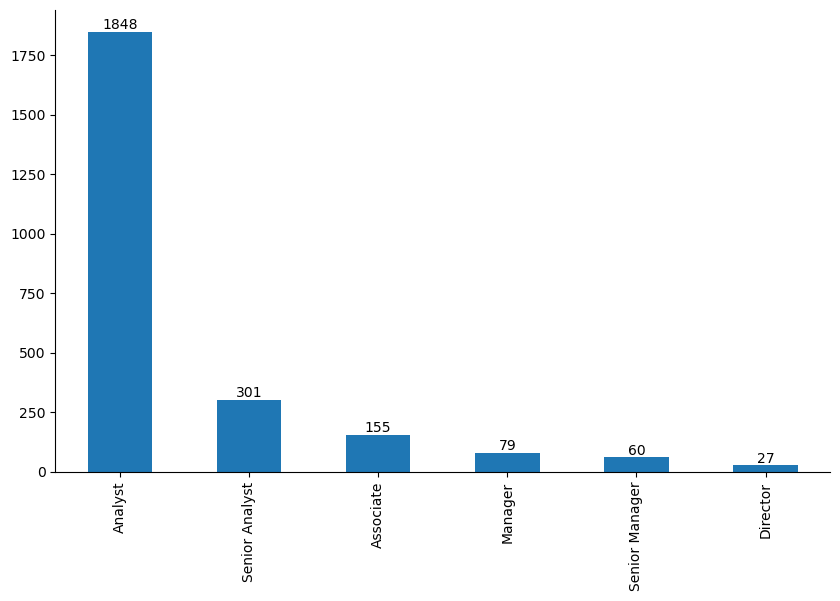

In [113]:
ax = df.DESIGNATION.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")  
ax.bar_label(ax.containers[0]);

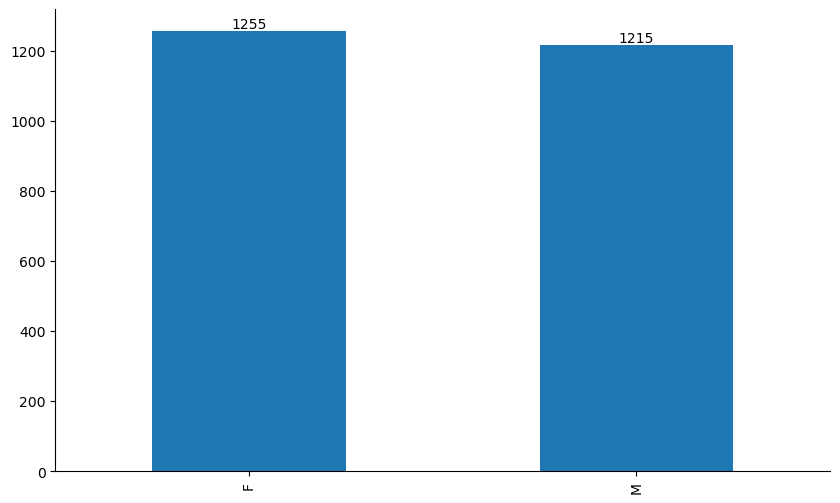

In [26]:
ax = df.SEX.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")   
ax.bar_label(ax.containers[0]);

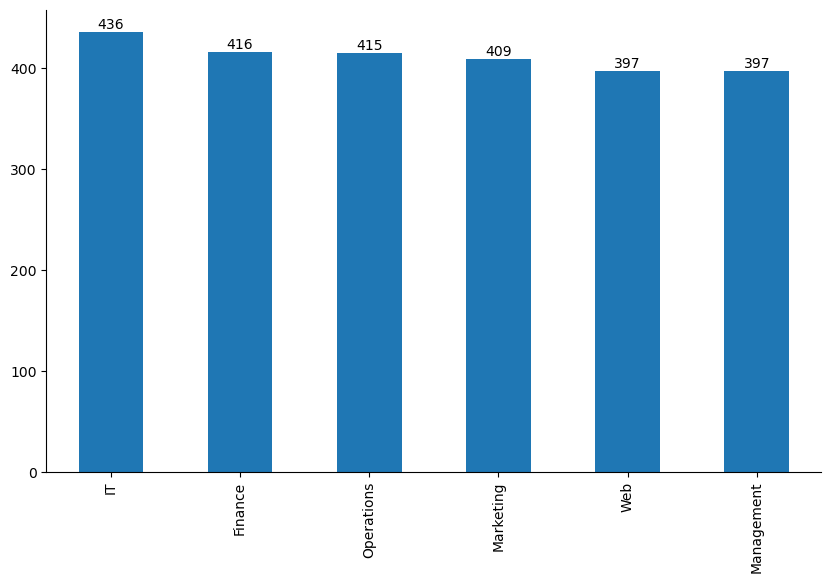

In [114]:
ax = df.UNIT.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
ax.bar_label(ax.containers[0]);

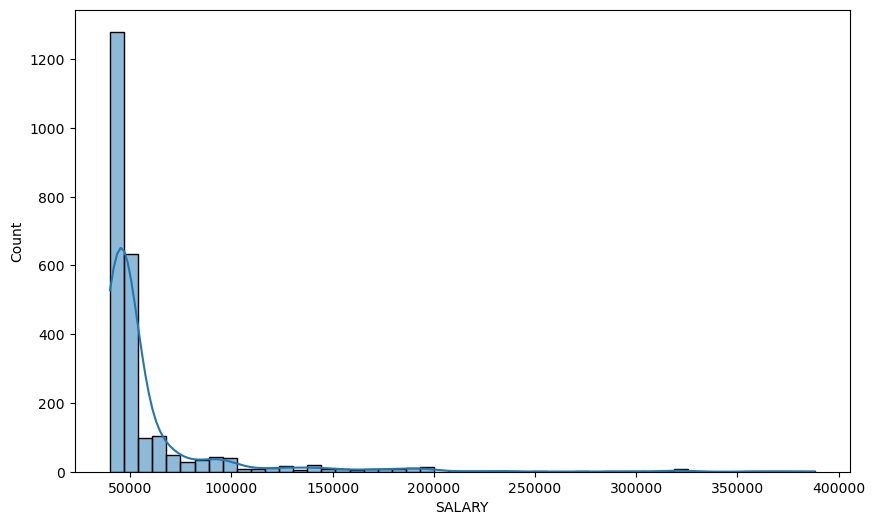

In [28]:
sns.histplot(df.SALARY, bins=50, kde=True);

In [29]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

AGE  SALARY  LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP  \
0    21.000   44570       24.000             6.000    2.000         0   
2    21.000   40955       23.000             7.000    3.000         0   
3    22.000   45550       22.000             8.000    3.000         0   
6    22.000   40339       19.000            11.000    5.000         0   
8    28.000   63478       20.000            10.000    3.000         1   
...     ...     ...          ...               ...      ...       ...   
2634 36.000  185977       15.000            15.000    5.000        10   
2635 23.000   45758       17.000            13.000    2.000         0   
2636 21.000   47315       29.000             1.000    5.000         0   
2637 24.000   45172       23.000             7.000    3.000         1   
2638 24.000   49176       17.000            13.000    2.000         2   

      DAYS IN COMPANY  
0                 599  
2                 528  
3                1009  
6                 857  
8                 557  
...               ...  
2634             1654  
2635              723  
2636              714  
2637              661  
2638              476  

[2470 rows x 7 columns]

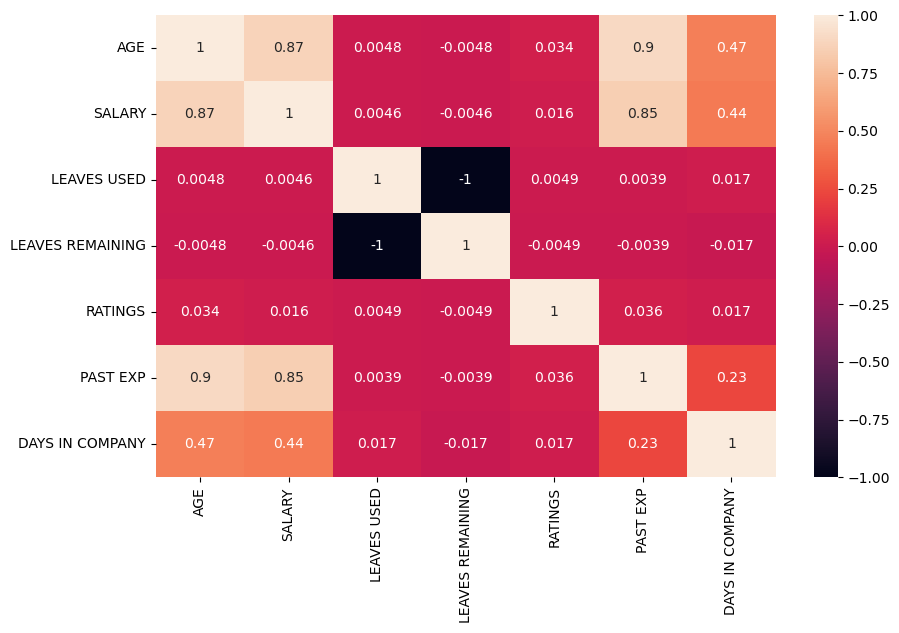

In [30]:
sns.heatmap(df_numeric.corr(), annot =True);

## Multicollinearity control

In [31]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any()

AGE                  True
SALARY              False
LEAVES USED         False
LEAVES REMAINING    False
RATINGS             False
PAST EXP             True
DAYS IN COMPANY     False
dtype: bool

In [32]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any()

AGE                 False
SALARY              False
LEAVES USED         False
LEAVES REMAINING    False
RATINGS             False
PAST EXP            False
DAYS IN COMPANY     False
dtype: bool

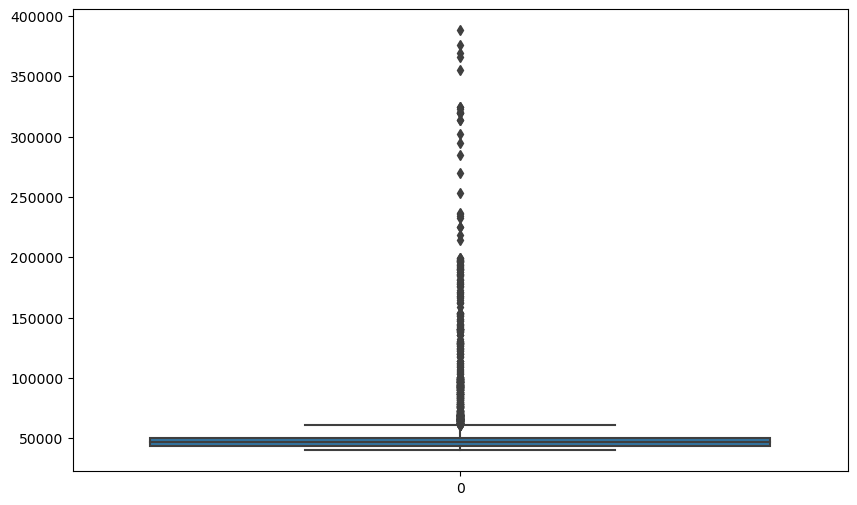

In [115]:
sns.boxplot(df.SALARY);

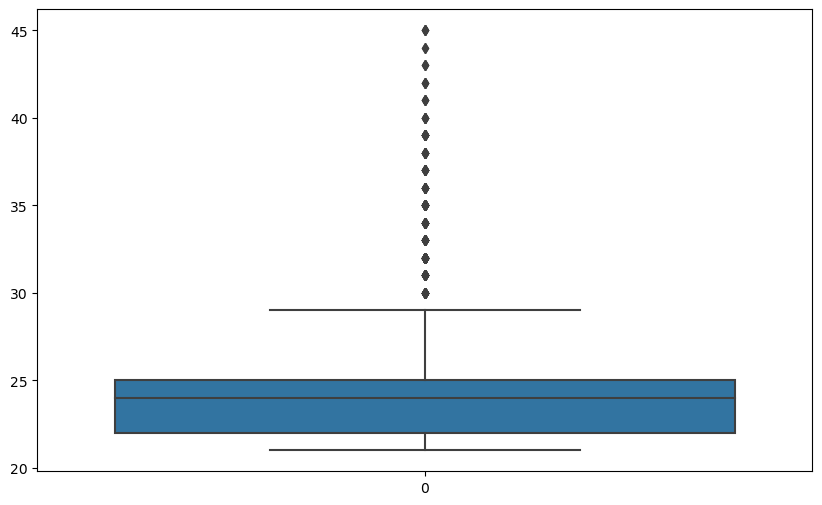

In [116]:
sns.boxplot(df.AGE);

In [35]:
df.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DESIGNATION', 'AGE', 'SALARY',
       'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP',
       'DAYS IN COMPANY'],
      dtype='object')

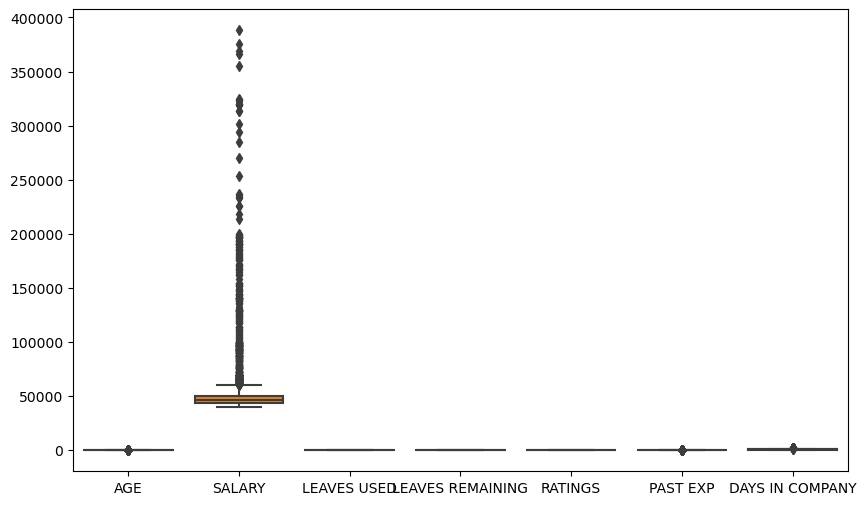

In [36]:
sns.boxplot(df.select_dtypes('number'));

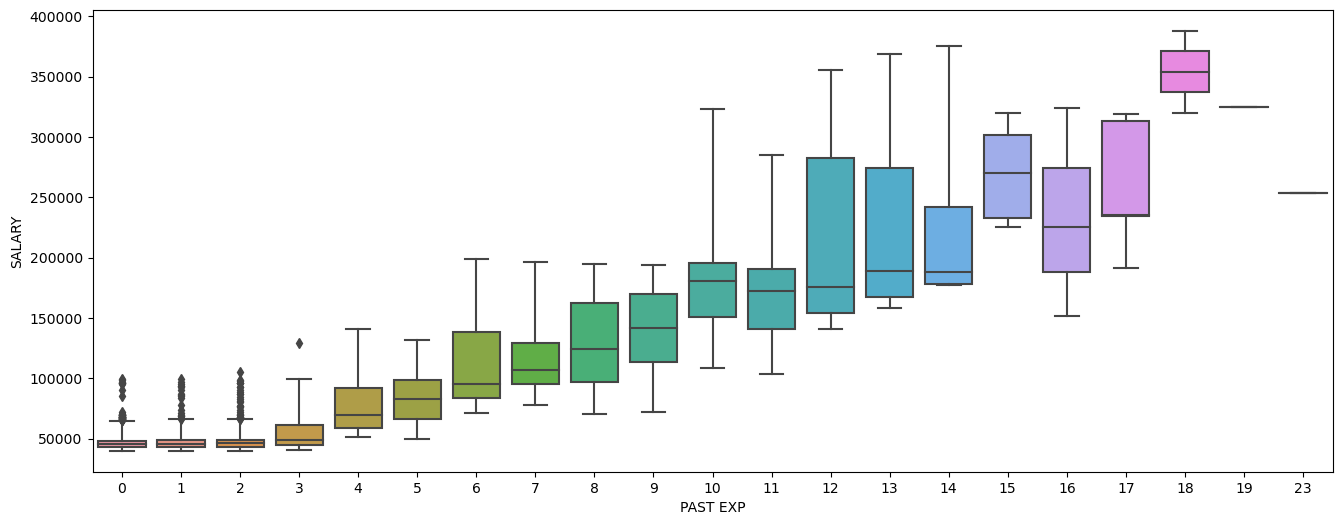

In [37]:
plt.figure(figsize=(16,6))
sns.boxplot(x="PAST EXP", y="SALARY", data=df, whis=3)
plt.show()

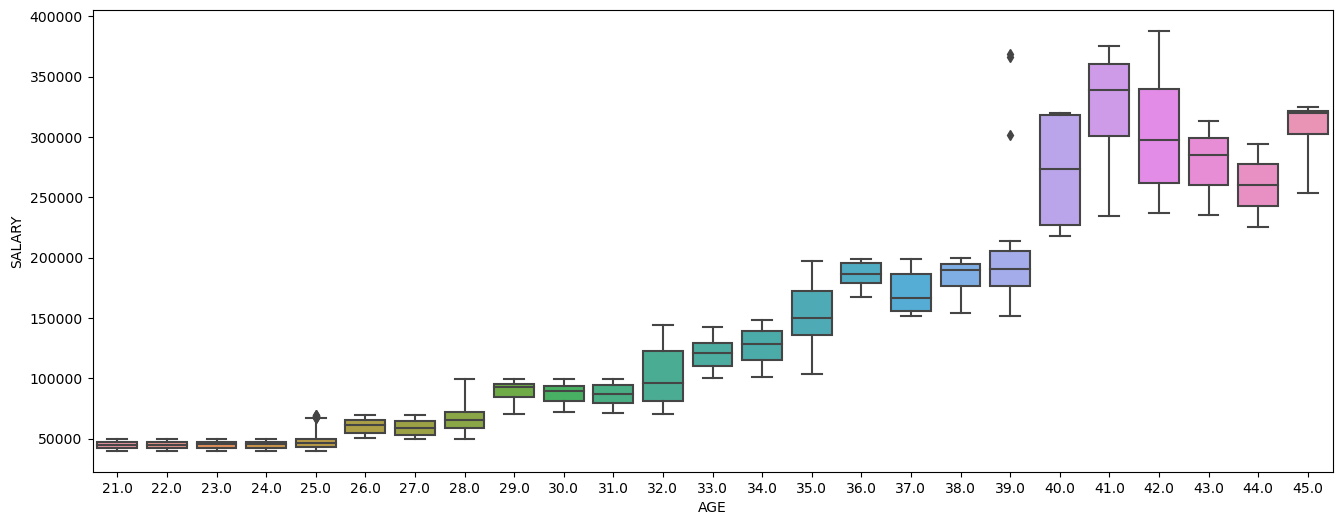

In [38]:
plt.figure(figsize=(16,6))
sns.boxplot(x="AGE", y="SALARY", data=df, whis=3)
plt.show()

In [39]:
df.isnull().any().any().sum()

0

In [40]:
corr_by_SALARY = df.corr()["SALARY"].sort_values()[:-1]
corr_by_SALARY

LEAVES REMAINING   -0.005
LEAVES USED         0.005
RATINGS             0.016
DAYS IN COMPANY     0.441
PAST EXP            0.851
AGE                 0.869
Name: SALARY, dtype: float64

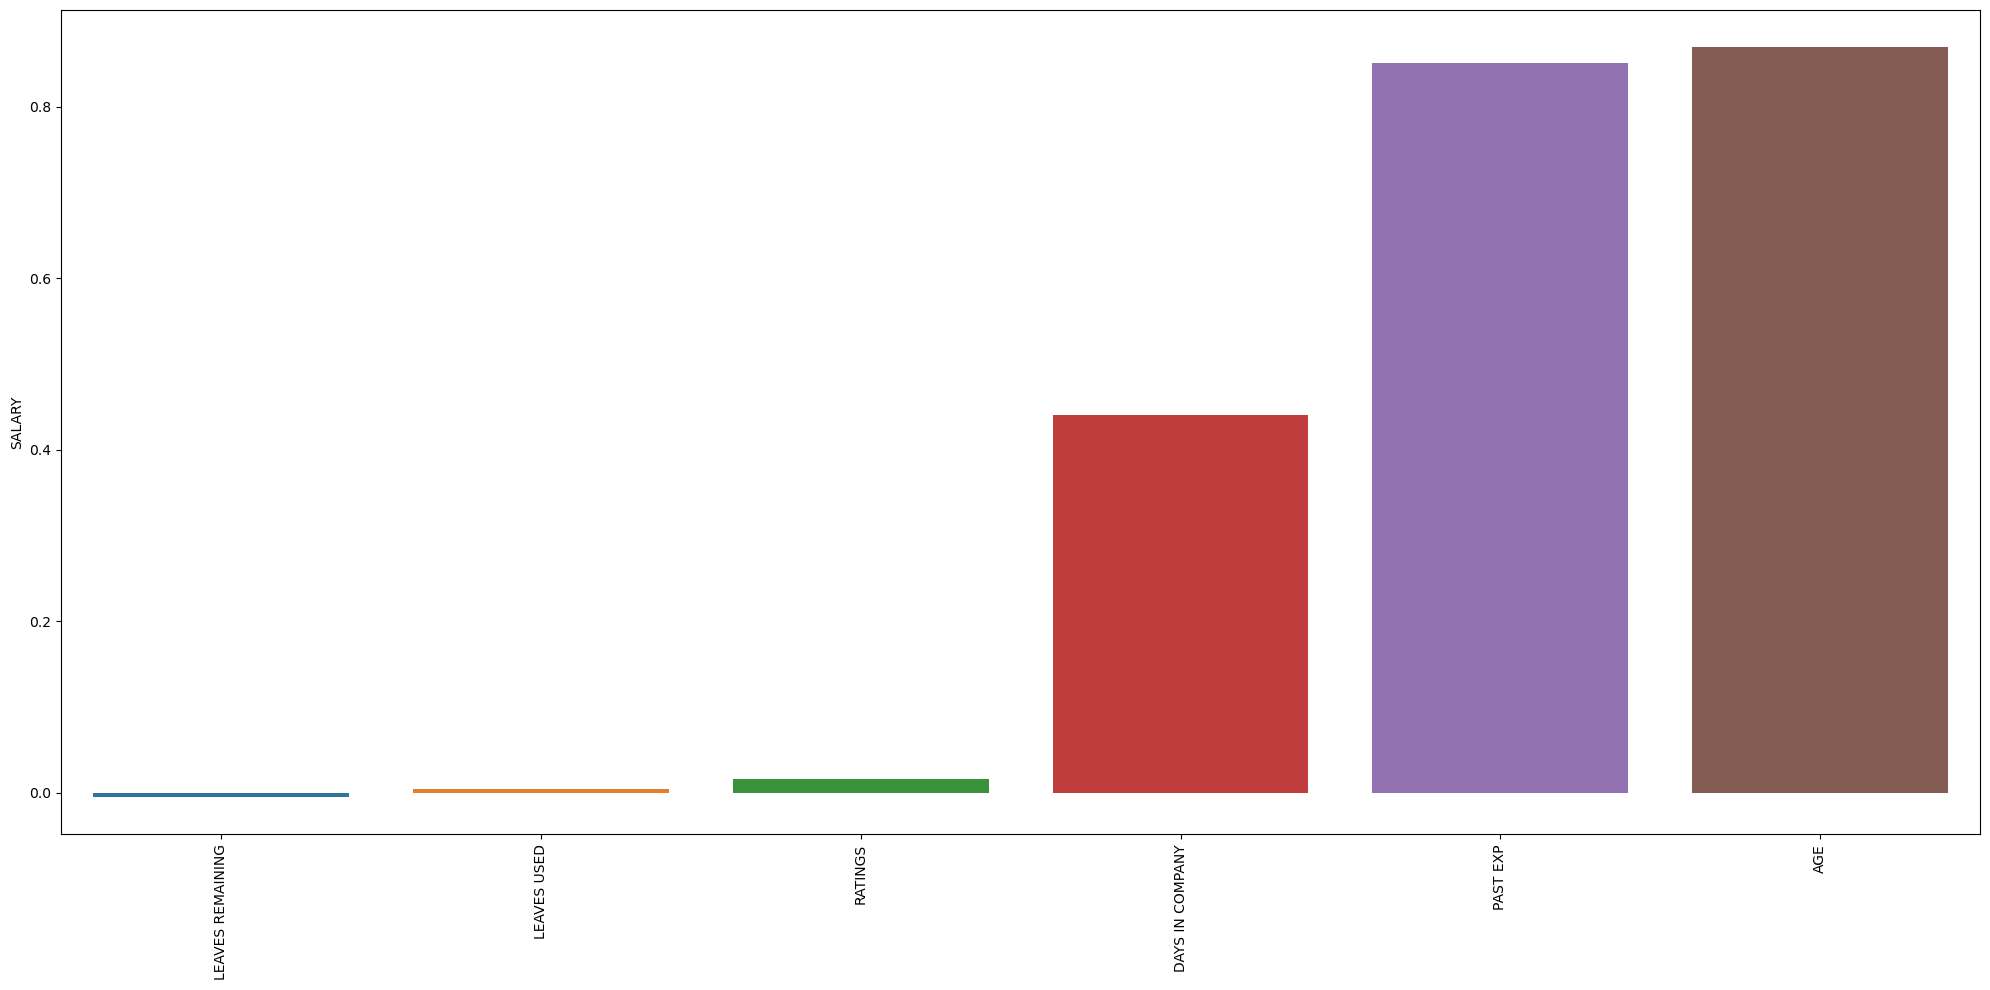

In [41]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_SALARY.index, y = corr_by_SALARY)
plt.xticks(rotation=90)
plt.tight_layout();

# Train | Test Split

In [42]:
df.head()

FIRST NAME LAST NAME SEX     DESIGNATION    AGE  SALARY        UNIT  \
0     TOMASA     ARMEN   F         Analyst 21.000   44570     Finance   
2      OLIVE      ANCY   F         Analyst 21.000   40955     Finance   
3     CHERRY   AQUILAR   F         Analyst 22.000   45550          IT   
6     ELLIOT    AGULAR   M         Analyst 22.000   40339   Marketing   
8      KATHY     ALSOP   F  Senior Analyst 28.000   63478  Operations   

   LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP  DAYS IN COMPANY  
0       24.000             6.000    2.000         0              599  
2       23.000             7.000    3.000         0              528  
3       22.000             8.000    3.000         0             1009  
6       19.000            11.000    5.000         0              857  
8       20.000            10.000    3.000         1              557

In [43]:
X= df[['DESIGNATION', 'UNIT', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP', 'DAYS IN COMPANY']]
y= df['SALARY']


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train.shape

(1976, 6)

In [46]:
X_test.shape

(494, 6)

# Implement Linear Regression

## Model

In [47]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {
    "train": {
    "R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {
    "R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
               }
    
    return pd.DataFrame(scores)

In [48]:
X.columns

Index(['DESIGNATION', 'UNIT', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP',
       'DAYS IN COMPANY'],
      dtype='object')

In [49]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),['DESIGNATION', 'UNIT']),
    remainder=StandardScaler())


operations = [('column_trans',column_trans), ('lm_model', LinearRegression())]
                                              
lm_pipe = Pipeline(steps= operations)

lm_pipe.fit(X_train, y_train)


Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['DESIGNATION', 'UNIT'])])),
                ('lm_model', LinearRegression())])

In [50]:
train_val(lm_pipe, X_train, y_train, X_test, y_test)

train         test
R2          0.959        0.952
mae      4173.311     4134.633
mse  56388327.870 62424712.822
rmse     7509.216     7900.931

In [51]:
y_pred = lm_pipe.predict(X_test)
lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Adjusted R2 Score

In [52]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)     
    n = df.shape[0]                    
    p = df.shape[1]-1                   
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)   
    return adj_r2

In [53]:
y_pred = lm_pipe.predict(X_test)

In [54]:
adj_r2(y_test, y_pred, df)

0.9517110691832182

## Cross Validate

In [55]:
operations = [('column_trans',column_trans), ('lm_model', LinearRegression())]                                             
lm_pipe = Pipeline(steps= operations)

scores = cross_validate(lm_pipe, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
             cv =10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_r2                                     0.951
train_r2                                    0.959
test_neg_mean_absolute_error            -4262.725
train_neg_mean_absolute_error           -4169.781
test_neg_mean_squared_error         -63214273.953
train_neg_mean_squared_error        -56035448.265
test_neg_root_mean_squared_error        -7802.361
train_neg_root_mean_squared_error       -7484.101
dtype: float64

In [56]:
7802/df.SALARY.mean()

0.13438803243613207

## Residual Plot

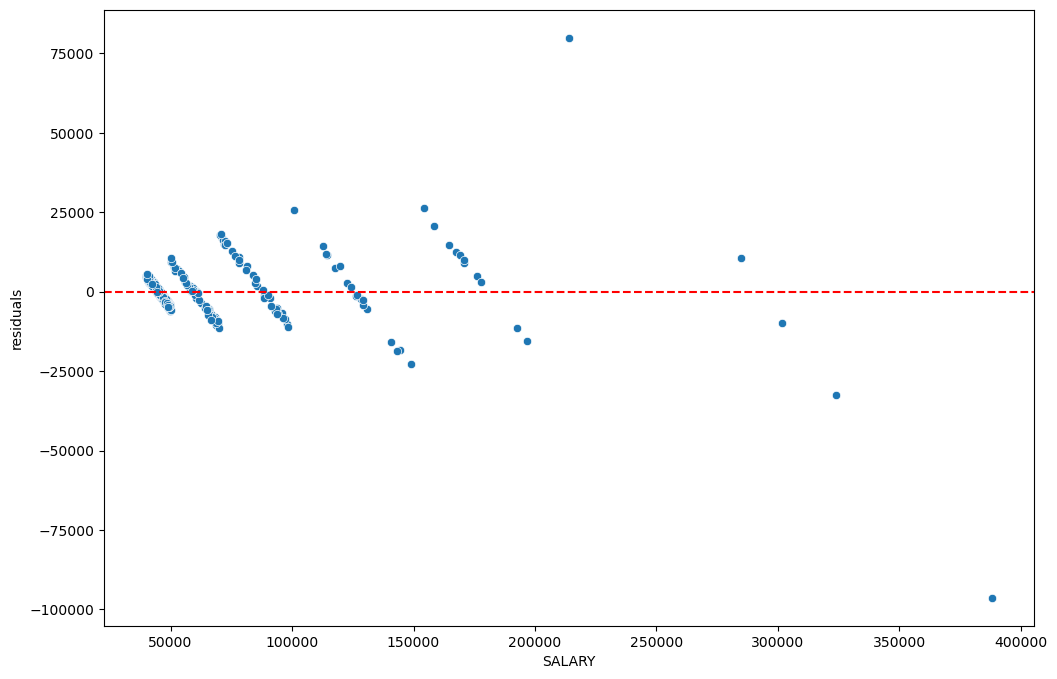

In [57]:
plt.figure(figsize=(12,8))
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

## Dropping observations from the dataset that worsen my predictions

In [58]:
df.nunique().sort_values(ascending=False)

LAST NAME           2469
FIRST NAME          2359
SALARY              2299
DAYS IN COMPANY      965
AGE                   25
PAST EXP              21
LEAVES USED           16
LEAVES REMAINING      16
DESIGNATION            6
UNIT                   6
RATINGS                4
SEX                    2
dtype: int64

In [59]:
X1= df[['DESIGNATION', 'UNIT', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP', 'DAYS IN COMPANY', 'SEX', 'LEAVES USED', 'AGE']]
y1= df['SALARY']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [61]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),['DESIGNATION', 'UNIT', 'SEX']),
    remainder=StandardScaler())


operations = [('column_trans',column_trans), ('lm2_model', LinearRegression())]
                                              
lm2_pipe = Pipeline(steps= operations)

lm2_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['DESIGNATION', 'UNIT',
                                                   'SEX'])])),
                ('lm2_model', LinearRegression())])

In [62]:
train_val(lm2_pipe, X_train, y_train, X_test, y_test)

train         test
R2          0.959        0.952
mae      4171.119     4129.094
mse  56330651.906 62458959.599
rmse     7505.375     7903.098

In [63]:
7903/df.SALARY.mean()   # as a result no serious change!

0.13612773908520273

In [64]:
y_pred = lm2_pipe.predict(X_test)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [65]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [66]:
comp_sample = compare.sample(20)
comp_sample

Actual       Pred   Residual
2092   42538  45089.782  -2551.782
2131   46157  44534.426   1622.574
2318   55455  59972.017  -4517.017
651    81191  88560.651  -7369.651
1603   43688  44138.419   -450.419
512    44454  44606.778   -152.778
541    47216  44654.142   2561.858
1520   42751  45714.946  -2963.946
2629   47849  44526.185   3322.815
1443   48360  45061.055   3298.945
2365   43070  45940.281  -2870.281
1450   45128  44697.505    430.495
855    45057  45200.270   -143.270
219    41514  45309.939  -3795.939
2299  114239 125242.107 -11003.107
1988   42952  45063.133  -2111.133
1432   43383  44876.101  -1493.101
1203   44774  44744.363     29.637
522    48476  45159.859   3316.141
444    96909  88333.516   8575.484

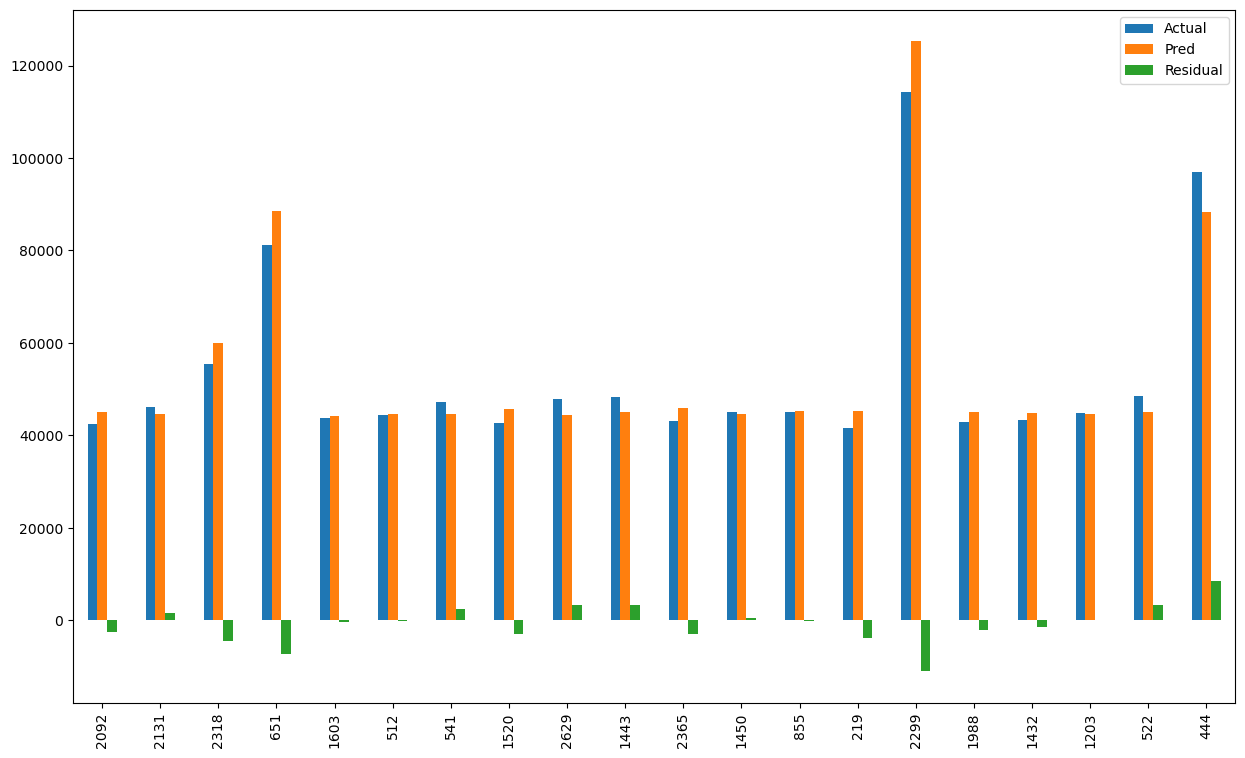

In [67]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

In [68]:
X2= df[['DESIGNATION', 'RATINGS', 'PAST EXP', 'DAYS IN COMPANY']]
y2= df['SALARY']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [70]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),['DESIGNATION']),
    remainder=StandardScaler())


operations = [('column_trans',column_trans), ('lm3_model', LinearRegression())]
                                              
lm3_pipe = Pipeline(steps= operations)

lm3_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['DESIGNATION'])])),
                ('lm3_model', LinearRegression())])

In [71]:
train_val(lm3_pipe, X_train, y_train, X_test, y_test)

train         test
R2          0.959        0.952
mae      4167.162     4109.232
mse  56498810.643 61851596.918
rmse     7516.569     7864.579

In [72]:
y_pred = lm3_pipe.predict(X_test)
lm3_R2 = r2_score(y_test, y_pred)
lm3_mae = mean_absolute_error(y_test, y_pred)
lm3_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Implement Ridge Regression

In [73]:
from sklearn.linear_model import Ridge

In [74]:
X= df[['DESIGNATION', 'UNIT', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP', 'DAYS IN COMPANY']]
y= df['SALARY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),['DESIGNATION', 'UNIT']),
    remainder=StandardScaler())


operations = [('column_trans',column_trans), ('rd_model', Ridge(random_state=42))]
                                              
rd_pipe = Pipeline(steps= operations)

rd_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['DESIGNATION', 'UNIT'])])),
                ('rd_model', Ridge(random_state=42))])

In [76]:
train_val(rd_pipe, X_train, y_train, X_test, y_test)

train         test
R2          0.954        0.947
mae      4545.004     4420.008
mse  62893200.200 69140327.715
rmse     7930.523     8315.066

In [77]:
y_pred = rd_pipe.predict(X_test)
rd_R2 = r2_score(y_test, y_pred)
rd_mae = mean_absolute_error(y_test, y_pred)
rd_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Implement Lasso Regression

In [78]:
from sklearn.linear_model import Lasso

In [79]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),['DESIGNATION', 'UNIT']),
    remainder=StandardScaler())


operations = [('column_trans',column_trans), ('ls_model', Lasso(random_state=42))]
                                              
ls_pipe = Pipeline(steps= operations)

ls_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['DESIGNATION', 'UNIT'])])),
                ('ls_model', Lasso(random_state=42))])

In [80]:
train_val(ls_pipe, X_train, y_train, X_test, y_test)

train         test
R2          0.959        0.952
mae      4173.452     4131.913
mse  56390190.790 62388818.438
rmse     7509.340     7898.659

In [81]:
y_pred = ls_pipe.predict(X_test)
ls_R2 = r2_score(y_test, y_pred)
ls_mae = mean_absolute_error(y_test, y_pred)
ls_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Implement Elastic-Net

In [82]:
from sklearn.linear_model import ElasticNet

In [83]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),['DESIGNATION', 'UNIT']),
    remainder=StandardScaler())


operations = [('column_trans',column_trans), ('el_model', ElasticNet(random_state=42))]
                                              
el_pipe = Pipeline(steps= operations)

el_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['DESIGNATION', 'UNIT'])])),
                ('el_model', ElasticNet(random_state=42))])

In [84]:
train_val(el_pipe, X_train, y_train, X_test, y_test)

train          test
R2           0.726         0.697
mae      10377.069     10565.761
mse  373673864.712 393049030.487
rmse     19330.646     19825.464

In [85]:
y_pred = el_pipe.predict(X_test)
el_R2 = r2_score(y_test, y_pred)
el_mae = mean_absolute_error(y_test, y_pred)
el_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# XGBOOST

In [86]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),['DESIGNATION', 'UNIT']),
    remainder=StandardScaler())


operations = [('column_trans',column_trans), ('xgb_model', XGBRegressor())]
                                              
xgb_pipe = Pipeline(steps= operations)

xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['DESIGNATION', 'UNIT'])])),
                ('xgb_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [87]:
train_val(xgb_pipe, X_train, y_train, X_test, y_test)

train         test
R2         0.998        0.926
mae     1288.526     4773.572
mse  2699961.109 96131833.840
rmse    1643.156     9804.684

In [88]:
y_pred = xgb_pipe.predict(X_test)
xgb_R2 = r2_score(y_test, y_pred)
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Random Forest

In [89]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),['DESIGNATION', 'UNIT']),
    remainder=StandardScaler())


operations = [('column_trans',column_trans), ('rf_model', RandomForestRegressor())]
                                              
rf_pipe = Pipeline(steps= operations)

rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['DESIGNATION', 'UNIT'])])),
                ('rf_model', RandomForestRegressor())])

In [90]:
train_val(rf_pipe, X_train, y_train, X_test, y_test)

train         test
R2          0.992        0.941
mae      1670.079     4408.939
mse  10295549.278 77134618.296
rmse     3208.668     8782.632

In [91]:
y_pred = rf_pipe.predict(X_test)
rf_R2 = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compare Models Performance

In [92]:
scores = {
    "linear_m": {
        "r2_score": lm_R2,
        "mae": lm_mae,
        "rmse": lm_rmse
    },
    
     "linear3_m": {
        "r2_score": lm3_R2,
        "mae": lm3_mae,
        "rmse": lm3_rmse
     },
    
    "ridge_m": {
        "r2_score": rd_R2,
        "mae": rd_mae,
        "rmse": rd_rmse
    },
    "lasso_m": {
        "r2_score": ls_R2,
        "mae": ls_mae,
        "rmse": ls_rmse
    },
    "elastic_m": {
        "r2_score": el_R2,
        "mae": el_mae,
        "rmse": el_rmse
    },
    "xgb_m": {
        "r2_score": xgb_R2,
        "mae": xgb_mae,
        "rmse": xgb_rmse
    },
     "rf_m": {
        "r2_score": rf_R2,
        "mae": rf_mae,
        "rmse": rf_rmse
    }
}
scores = pd.DataFrame(scores).T
scores

r2_score       mae      rmse
linear_m      0.952  4129.094  7903.098
linear3_m     0.952  4109.232  7864.579
ridge_m       0.947  4420.008  8315.066
lasso_m       0.952  4131.913  7898.659
elastic_m     0.697 10565.761 19825.464
xgb_m         0.926  4773.572  9804.684
rf_m          0.941  4408.939  8782.632

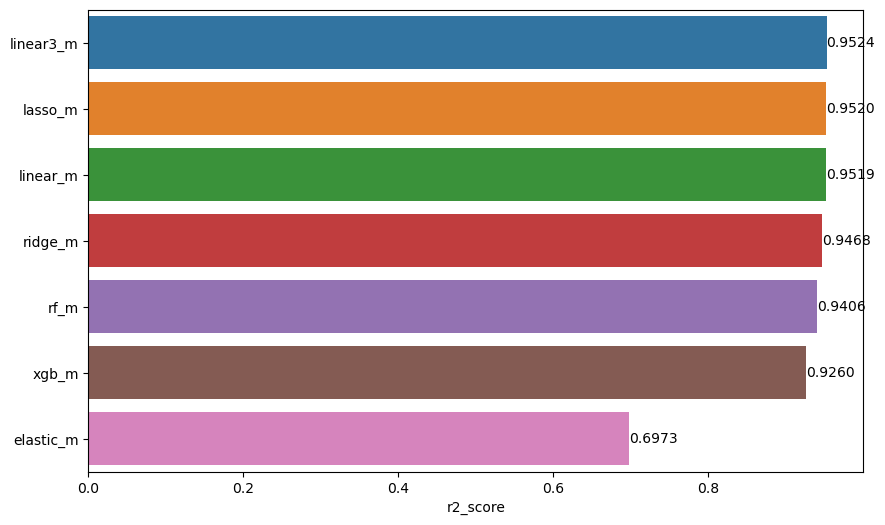

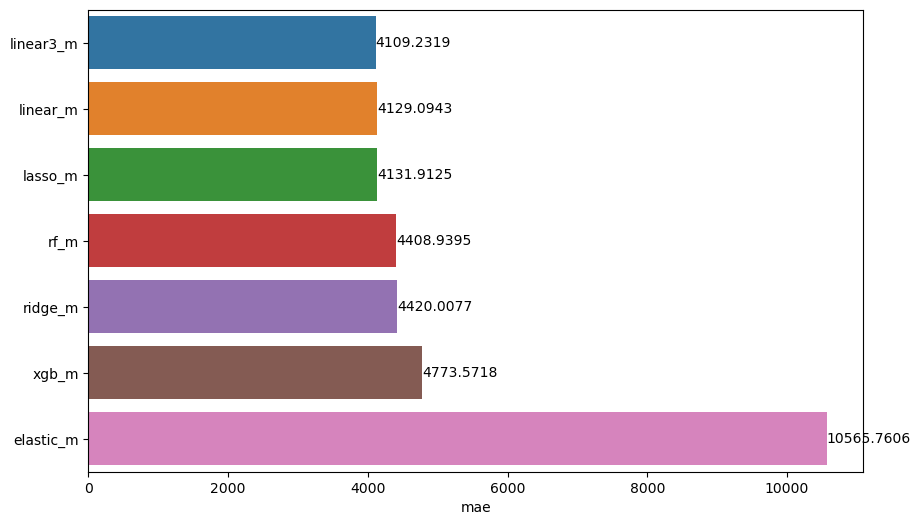

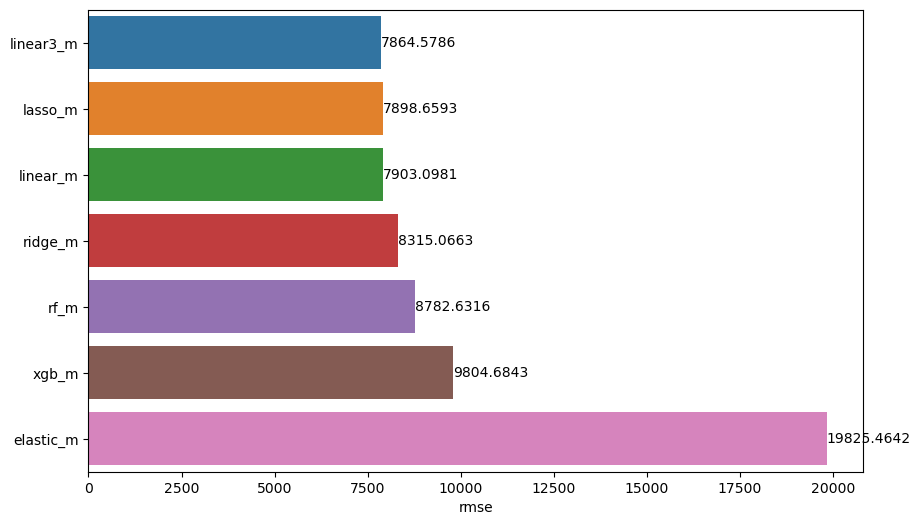

In [93]:
#metrics = scores.columns

for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False 
    else:
        ascending = True 
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

##  Prediction with random samples

In [96]:
#df_new.to_csv('Salary_data.csv', index=False)

In [97]:
df_new = df[['DESIGNATION','RATINGS', 'PAST EXP', 'DAYS IN COMPANY', 'SALARY']]

In [98]:
X= df_new[['DESIGNATION', 'RATINGS', 'PAST EXP', 'DAYS IN COMPANY']]
y= df_new['SALARY']


In [99]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",drop="first",
                                                     sparse_output=False),['DESIGNATION']),
    remainder=StandardScaler())


operations = [('column_trans',column_trans), ('linear_model', LinearRegression())]
                                              
linear_model = Pipeline(steps= operations)

linear_model.fit(X, y)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['DESIGNATION'])])),
                ('linear_model', LinearRegression())])

In [100]:
random_samples = df_new.sample(n=20)

In [101]:
X_random = random_samples.drop(columns=["SALARY"])

In [102]:
predictions =linear_model.predict(X_random)
predictions

array([ 45203.49919724,  45082.08249741,  45356.92422539,  44853.93321738,
        45119.24935384,  45200.4005835 ,  45202.70249179,  44745.16521006,
       179198.23750391,  45350.02462233,  87122.17303998,  45089.32454608,
        45306.74262467,  44941.87223586,  45193.02835516,  45223.88004806,
        45197.16566827,  45083.33958452,  45222.94704111,  45100.71002966])

In [103]:
true_labels = random_samples["SALARY"].values
true_labels

array([ 43282,  48082,  40752,  48976,  48831,  46370,  42195,  49873,
       192623,  47846,  85615,  49686,  42735,  43952,  48122,  45790,
        43592,  40183,  45818,  40436])

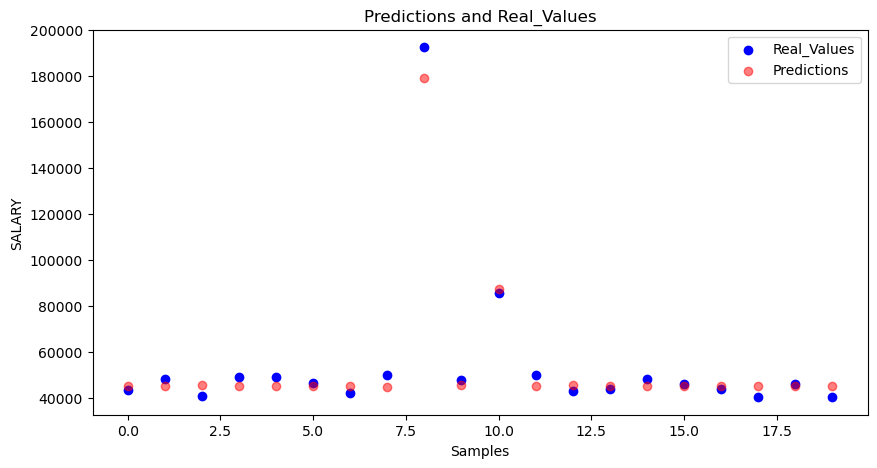

In [104]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(true_labels)), true_labels, color='blue', label='Real_Values')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predictions', alpha=0.5)
plt.title('Predictions and Real_Values')
plt.xlabel('Samples')
plt.ylabel('SALARY')
plt.legend()
plt.show()

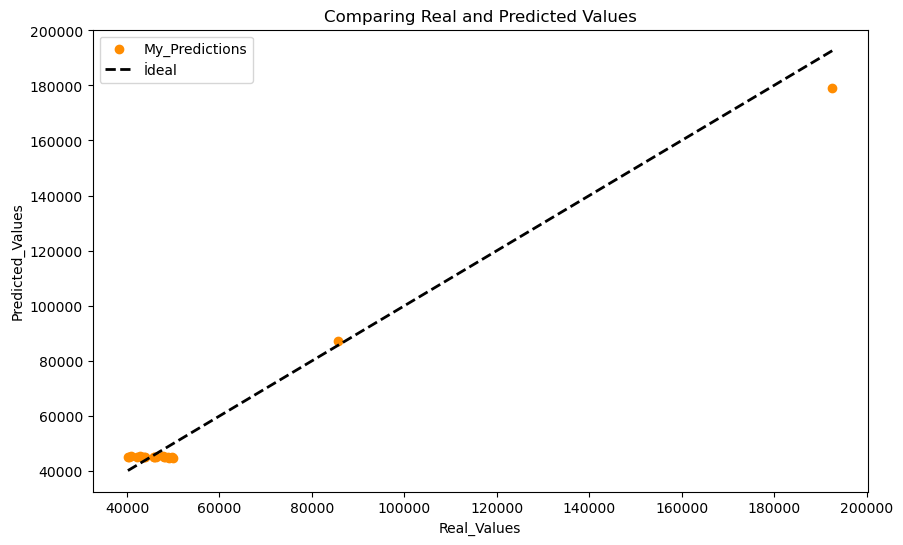

In [118]:
plt.figure(figsize=(10, 6))
plt.scatter(true_labels, predictions, color='darkorange', label='My_Predictions')
plt.plot([min(true_labels), max(true_labels)], [min(true_labels), max(true_labels)], 'k--', lw=2, label='İdeal')
plt.xlabel('Real_Values')
plt.ylabel('Predicted_Values')
plt.title('Comparing Real and Predicted Values')
plt.legend()
plt.show()

# Final Model

In [106]:
import pickle

In [107]:
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(linear_model, f)

In [108]:
with open('linear_model.pkl', 'rb') as f:
    loaded_linear_model = pickle.load(f)

In [109]:
predictions = loaded_linear_model.predict(X_random)

In [110]:
predictions

array([ 45203.49919724,  45082.08249741,  45356.92422539,  44853.93321738,
        45119.24935384,  45200.4005835 ,  45202.70249179,  44745.16521006,
       179198.23750391,  45350.02462233,  87122.17303998,  45089.32454608,
        45306.74262467,  44941.87223586,  45193.02835516,  45223.88004806,
        45197.16566827,  45083.33958452,  45222.94704111,  45100.71002966])